# Using standard machine learning classifiers

In [3]:
csv_file='data/features_right_thigh.csv'

In [4]:
from falldetection.feature_extractor_workflow import extract_features_and_save, FeatureExtractorWorkflow

# extract_features_and_save(baseDir='data/FallDataSet', csv_file=csv_file)

In [5]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

data = pd.read_csv(csv_file, index_col=0)

# Success - Display the first record
display(data.head(n=5))

,sensorFile,fall,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocorr_lag_1,Acc_X_autocorr_lag_2,Acc_X_autocorr_lag_3,Acc_X_autocorr_lag_4,Acc_X_autocorr_lag_5,Acc_X_autocorr_lag_6,Acc_X_autocorr_lag_7,Acc_X_autocorr_lag_8,Acc_X_autocorr_lag_9,Acc_X_autocorr_lag_10,Acc_X_autocorr_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocorr_lag_1,Acc_Y_autocorr_lag_2,Acc_Y_autocorr_lag_3,Acc_Y_autocorr_lag_4,Acc_Y_autocorr_lag_5,Acc_Y_autocorr_lag_6,Acc_Y_autocorr_lag_7,Acc_Y_autocorr_lag_8,Acc_Y_autocorr_lag_9,Acc_Y_autocorr_lag_10,Acc_Y_autocorr_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocorr_lag_1,Acc_Z_autocorr_lag_2,Acc_Z_autocorr_lag_3,Acc_Z_autocorr_lag_4,Acc_Z_autocorr_lag_5,Acc_Z_autocorr_lag_6,Acc_Z_autocorr_lag_7,Acc_Z_autocorr_lag_8,Acc_Z_autocorr_lag_9,Acc_Z_autocorr_lag_10,Acc_Z_autocorr_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocorr_lag_1,Gyr_X_autocorr_lag_2,Gyr_X_autocorr_lag_3,Gyr_X_autocorr_lag_4,Gyr_X_autocorr_lag_5,Gyr_X_autocorr_lag_6,Gyr_X_autocorr_lag_7,Gyr_X_autocorr_lag_8,Gyr_X_autocorr_lag_9,Gyr_X_autocorr_lag_10,Gyr_X_autocorr_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocorr_lag_1,Gyr_Y_autocorr_lag_2,Gyr_Y_autocorr_lag_3,Gyr_Y_autocorr_lag_4,Gyr_Y_autocorr_lag_5,Gyr_Y_autocorr_lag_6,Gyr_Y_autocorr_lag_7,Gyr_Y_autocorr_lag_8,Gyr_Y_autocorr_lag_9,Gyr_Y_autocorr_lag_10,Gyr_Y_autocorr_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocorr_lag_1,Gyr_Z_autocorr_lag_2,Gyr_Z_autocorr_lag_3,Gyr_Z_autocorr_lag_4,Gyr_Z_autocorr_lag_5,Gyr_Z_autocorr_lag_6,Gyr_Z_autocorr_lag_7,Gyr_Z_autocorr_lag_8,Gyr_Z_autocorr_lag_9,Gyr_Z_autocorr_lag_10,Gyr_Z_autocorr_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocorr_lag_1,Mag_X_autocorr_lag_2,Mag_X_autocorr_lag_3,Mag_X_autocorr_lag_4,Mag_X_autocorr_lag_5,Mag_X_autocorr_lag_6,Mag_X_autocorr_lag_7,Mag_X_autocorr_lag_8,Mag_X_autocorr_lag_9,Mag_X_autocorr_lag_10,Mag_X_autocorr_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocorr_lag_1,Mag_Y_autocorr_lag_2,Mag_Y_autocorr_lag_3,Mag_Y_autocorr_lag_4,Mag_Y_autocorr_lag_5,Mag_Y_autocorr_lag_6,Mag_Y_autocorr_lag_7,Mag_Y_autocorr_lag_8,Mag_Y_autocorr_lag_9,Mag_Y_autocorr_lag_10,Mag_Y_autocorr_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocorr_lag_1,Mag_Z_autocorr_lag_2,Mag_Z_autocorr_lag_3,Mag_Z_autocorr_lag_4,Mag_Z_autocorr_lag_5,Mag_Z_autocorr_lag_6,Mag_Z_autocorr_lag_7,Mag_Z_autocorr_lag_8,Mag_Z_autocorr_lag_9,Mag_Z_autocorr_lag_10,Mag_Z_autocorr_lag_11
0,../../data/FallDataSet/209/Testler Export/813/...,False,8.030701,10.127258,9.067593,0.266656,-0.171129,-0.919953,0.248744,0.221720,0.201647,0.186368,0.169107,0.155824,0.147208,0.136408,0.123149,0.109615,0.099428,0.347900,1.450825,0.869205,0.061220,0.023209,-0.556630,0.056294,0.048496,0.041883,0.039141,0.038966,0.040041,0.041059,0.041021,0.039896,0.037013,0.032154,2.986836,5.015564,3.920029,0.491656,0.433932,-1.419709,0.475478,0.454742,0.435691,0.416500,0.394523,0.371950,0.349767,0.328469,0.304696,0.280887,0.259479,-0.083494,0.155068,-0.011506,0.001836,1.603520,3.704183,0.001452,0.000871,0.000427,0.000170,0.000067,-0.000007,-0.000065,-0.000096,-0.000069,-0.000135,-0.000182,-0.242425,0.086403,-0.047935,0.006193,-1.024068,-0.069452,0.005770,0.005039,0.004189,0.003316,0.002455,0.001762,0.001181,0.000704,0.000306,0.000028,-0.000159,-0.097132,0.148964,0.010077,0.002822,0.999498,0.840014,0.002673,0.002399,0.002113,0.001840,0.001600,0.001385,0.001184,0.000959,0.000696,0.000412,0.000137,-0.664551,-0.492920,-0.595123,0.004133,0.497284,-1.336982,0.004062,0.003975,0.003873,0.003760,0.003635,0.003500,0.003362,0.003220,0.003076,0.002935,0.002793,0.086914,0.158936,0.120946,0.000487,0.038112,-1.215131,0.000472,0.000457,0.000441,0.000426,0.000410,0.000393,0.000374,0.000358,0.00

In [11]:
# TODO: Total number of records
n_records = len(data)

n_fall = len(data[data['fall'] == True])
n_adl = len(data[data['fall'] == False])

def fall_percent(y):
    return (len(y[y == True]) / len(y)) * 100    

# Print the results
print("Total number of records: {}".format(n_records))
print("Number of falls: {}".format(n_fall))
print("Number of ADLs: {}".format(n_adl))
print("Percentage of falls: {:.2f}%".format(fall_percent(data['fall'])))
print("Percentage of ADLs: {:.2f}%".format(100 - fall_percent(data['fall'])))

Total number of records: 3296
Number of falls: 1822
Number of ADLs: 1474
Percentage of falls: 55.28%
Percentage of ADLs: 44.72%


In [5]:
y = data['fall']
X = data.drop(columns=['fall', 'sensorFile'])
X.head()

,Acc_X_min,Acc_X_max,Acc_X_mean,Acc_X_var,Acc_X_skew,Acc_X_kurtosis,Acc_X_autocorr_lag_1,Acc_X_autocorr_lag_2,Acc_X_autocorr_lag_3,Acc_X_autocorr_lag_4,Acc_X_autocorr_lag_5,Acc_X_autocorr_lag_6,Acc_X_autocorr_lag_7,Acc_X_autocorr_lag_8,Acc_X_autocorr_lag_9,Acc_X_autocorr_lag_10,Acc_X_autocorr_lag_11,Acc_Y_min,Acc_Y_max,Acc_Y_mean,Acc_Y_var,Acc_Y_skew,Acc_Y_kurtosis,Acc_Y_autocorr_lag_1,Acc_Y_autocorr_lag_2,Acc_Y_autocorr_lag_3,Acc_Y_autocorr_lag_4,Acc_Y_autocorr_lag_5,Acc_Y_autocorr_lag_6,Acc_Y_autocorr_lag_7,Acc_Y_autocorr_lag_8,Acc_Y_autocorr_lag_9,Acc_Y_autocorr_lag_10,Acc_Y_autocorr_lag_11,Acc_Z_min,Acc_Z_max,Acc_Z_mean,Acc_Z_var,Acc_Z_skew,Acc_Z_kurtosis,Acc_Z_autocorr_lag_1,Acc_Z_autocorr_lag_2,Acc_Z_autocorr_lag_3,Acc_Z_autocorr_lag_4,Acc_Z_autocorr_lag_5,Acc_Z_autocorr_lag_6,Acc_Z_autocorr_lag_7,Acc_Z_autocorr_lag_8,Acc_Z_autocorr_lag_9,Acc_Z_autocorr_lag_10,Acc_Z_autocorr_lag_11,Gyr_X_min,Gyr_X_max,Gyr_X_mean,Gyr_X_var,Gyr_X_skew,Gyr_X_kurtosis,Gyr_X_autocorr_lag_1,Gyr_X_autocorr_lag_2,Gyr_X_autocorr_lag_3,Gyr_X_autocorr_lag_4,Gyr_X_autocorr_lag_5,Gyr_X_autocorr_lag_6,Gyr_X_autocorr_lag_7,Gyr_X_autocorr_lag_8,Gyr_X_autocorr_lag_9,Gyr_X_autocorr_lag_10,Gyr_X_autocorr_lag_11,Gyr_Y_min,Gyr_Y_max,Gyr_Y_mean,Gyr_Y_var,Gyr_Y_skew,Gyr_Y_kurtosis,Gyr_Y_autocorr_lag_1,Gyr_Y_autocorr_lag_2,Gyr_Y_autocorr_lag_3,Gyr_Y_autocorr_lag_4,Gyr_Y_autocorr_lag_5,Gyr_Y_autocorr_lag_6,Gyr_Y_autocorr_lag_7,Gyr_Y_autocorr_lag_8,Gyr_Y_autocorr_lag_9,Gyr_Y_autocorr_lag_10,Gyr_Y_autocorr_lag_11,Gyr_Z_min,Gyr_Z_max,Gyr_Z_mean,Gyr_Z_var,Gyr_Z_skew,Gyr_Z_kurtosis,Gyr_Z_autocorr_lag_1,Gyr_Z_autocorr_lag_2,Gyr_Z_autocorr_lag_3,Gyr_Z_autocorr_lag_4,Gyr_Z_autocorr_lag_5,Gyr_Z_autocorr_lag_6,Gyr_Z_autocorr_lag_7,Gyr_Z_autocorr_lag_8,Gyr_Z_autocorr_lag_9,Gyr_Z_autocorr_lag_10,Gyr_Z_autocorr_lag_11,Mag_X_min,Mag_X_max,Mag_X_mean,Mag_X_var,Mag_X_skew,Mag_X_kurtosis,Mag_X_autocorr_lag_1,Mag_X_autocorr_lag_2,Mag_X_autocorr_lag_3,Mag_X_autocorr_lag_4,Mag_X_autocorr_lag_5,Mag_X_autocorr_lag_6,Mag_X_autocorr_lag_7,Mag_X_autocorr_lag_8,Mag_X_autocorr_lag_9,Mag_X_autocorr_lag_10,Mag_X_autocorr_lag_11,Mag_Y_min,Mag_Y_max,Mag_Y_mean,Mag_Y_var,Mag_Y_skew,Mag_Y_kurtosis,Mag_Y_autocorr_lag_1,Mag_Y_autocorr_lag_2,Mag_Y_autocorr_lag_3,Mag_Y_autocorr_lag_4,Mag_Y_autocorr_lag_5,Mag_Y_autocorr_lag_6,Mag_Y_autocorr_lag_7,Mag_Y_autocorr_lag_8,Mag_Y_autocorr_lag_9,Mag_Y_autocorr_lag_10,Mag_Y_autocorr_lag_11,Mag_Z_min,Mag_Z_max,Mag_Z_mean,Mag_Z_var,Mag_Z_skew,Mag_Z_kurtosis,Mag_Z_autocorr_lag_1,Mag_Z_autocorr_lag_2,Mag_Z_autocorr_lag_3,Mag_Z_autocorr_lag_4,Mag_Z_autocorr_lag_5,Mag_Z_autocorr_lag_6,Mag_Z_autocorr_lag_7,Mag_Z_autocorr_lag_8,Mag_Z_autocorr_lag_9,Mag_Z_autocorr_lag_10,Mag_Z_autocorr_lag_11
0,8.030701,10.127258,9.067593,0.266656,-0.171129,-0.919953,0.248744,0.221720,0.201647,0.186368,0.169107,0.155824,0.147208,0.136408,0.123149,0.109615,0.099428,0.347900,1.450825,0.869205,0.061220,0.023209,-0.556630,0.056294,0.048496,0.041883,0.039141,0.038966,0.040041,0.041059,0.041021,0.039896,0.037013,0.032154,2.986836,5.015564,3.920029,0.491656,0.433932,-1.419709,0.475478,0.454742,0.435691,0.416500,0.394523,0.371950,0.349767,0.328469,0.304696,0.280887,0.259479,-0.083494,0.155068,-0.011506,0.001836,1.603520,3.704183,0.001452,0.000871,0.000427,0.000170,0.000067,-0.000007,-0.000065,-0.000096,-0.000069,-0.000135,-0.000182,-0.242425,0.086403,-0.047935,0.006193,-1.024068,-0.069452,0.005770,0.005039,0.004189,0.003316,0.002455,0.001762,0.001181,0.000704,0.000306,0.000028,-0.000159,-0.097132,0.148964,0.010077,0.002822,0.999498,0.840014,0.002673,0.002399,0.002113,0.001840,0.001600,0.001385,0.001184,0.000959,0.000696,0.000412,0.000137,-0.664551,-0.492920,-0.595123,0.004133,0.497284,-1.336982,0.004062,0.003975,0.003873,0.003760,0.003635,0.003500,0.003362,0.003220,0.003076,0.002935,0.002793,0.086914,0.158936,0.120946,0.000487,0.038112,-1.215131,0.000472,0.000457,0.000441,0.000426,0.000410,0.000393,0.000374,0.000358,0.000341,0.000326,0.000312,-1.235596,-1.136475,-1.184546,0.001102,-0.135640,

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=815)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
    
print("Percentage of train falls: {:.2f}%".format(fall_percent(y_train)))
print("Percentage of test falls: {:.2f}%".format(fall_percent(y_test)))

Training set has 2636 samples.
Testing set has 660 samples.
Percentage of train falls: 55.01%
Percentage of test falls: 56.36%


In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# clf = SVC(C=100, gamma=0.0001, random_state=815)
clf = SVC(C=10, random_state=815)
# clf = DecisionTreeClassifier(random_state=815)
# clf = RandomForestClassifier(random_state=815)
# clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=815, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
predictions_test = clf.predict(X_test)

In [9]:
from sklearn.metrics import fbeta_score

score = fbeta_score(y_test, predictions_test, beta=2.0)
score

0.9914712153518123

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions_test)

0.9757575757575757

In [11]:
from sklearn.metrics import confusion_matrix

display(confusion_matrix(y_test, predictions_test))

tn, fp, fn, tp = confusion_matrix(y_test, predictions_test).ravel()
(tn, fp, fn, tp)

array([[272,  16],
       [  0, 372]])

(272, 16, 0, 372)

In [12]:
always_fall_prediction = np.array([True]*len(X_test))
always_adl_prediction = np.array([False]*len(X_test))
random_prediction = np.random.choice([True, False], len(X_test))

print("accuracy_score(always_fall_prediction): ", accuracy_score(y_test, always_fall_prediction))
print("accuracy_score(always_adl_prediction): ", accuracy_score(y_test, always_adl_prediction))
print("accuracy_score(random_prediction): ", accuracy_score(y_test, random_prediction))

accuracy_score(always_fall_prediction):  0.5636363636363636
accuracy_score(always_adl_prediction):  0.43636363636363634
accuracy_score(random_prediction):  0.45151515151515154


In [13]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, beta): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

SVC trained on 26 samples.
SVC trained on 263 samples.
SVC trained on 2636 samples.
DecisionTreeClassifier trained on 26 samples.
DecisionTreeClassifier trained on 263 samples.
DecisionTreeClassifier trained on 2636 samples.
RandomForestClassifier trained on 26 samples.
RandomForestClassifier trained on 263 samples.
RandomForestClassifier trained on 2636 samples.
KNeighborsClassifier trained on 26 samples.
KNeighborsClassifier trained on 263 samples.
KNeighborsClassifier trained on 2636 samples.


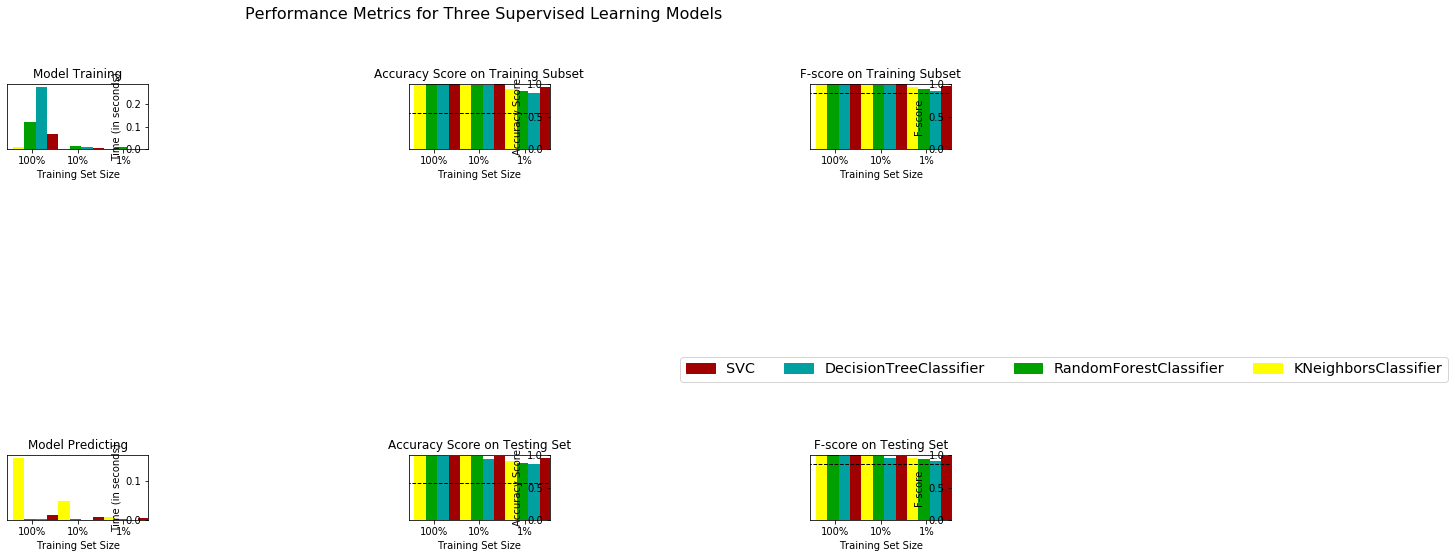

In [14]:
import visuals as vs

# TODO: Initialize the three models
# clf = RandomForestClassifier(random_state=815)
# clf = KNeighborsClassifier(n_neighbors=7)
clf_A = SVC(C=100, gamma=0.0001, random_state=815)
clf_B = DecisionTreeClassifier(random_state = 815)
clf_C = RandomForestClassifier(random_state=815)
clf_D = KNeighborsClassifier(n_neighbors=7)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(10/100 * samples_100)
samples_1 = int(1/100 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test, beta=2.0)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy_score(y_test, always_fall_prediction), fbeta_score(y_test, always_fall_prediction, beta=2.0))

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
#print(pca.explained_variance_ratio_)
#print(pca.components_)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
def get_cumulative_explained_variance_ratio_description(pca, n):
    cumulative_explained_variance_ratio = sum(pca.explained_variance_ratio_[:n])
    return "{0:f}% variance in the data is explained by the first {1} principal components.".format(cumulative_explained_variance_ratio * 100, n)
    
print(get_cumulative_explained_variance_ratio_description(pca, 5))
print(get_cumulative_explained_variance_ratio_description(pca, 10))

99.612279% variance in the data is explained by the first 5 principal components.
99.876617% variance in the data is explained by the first 10 principal components.


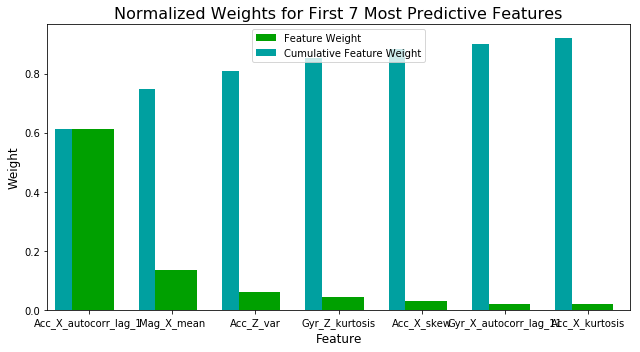

['Acc_X_autocorr_lag_1' 'Mag_X_mean' 'Acc_Z_var' 'Gyr_Z_kurtosis'
 'Acc_X_skew' 'Gyr_X_autocorr_lag_11' 'Acc_X_kurtosis']


In [17]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
# model = RandomForestClassifier(random_state=815)
model = DecisionTreeClassifier(random_state=815)
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
columns = vs.feature_plot(importances, X_train, 7)
print(columns)

In [18]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = SVC(random_state=815)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [10, 100, 1000], 'gamma' : [0.00001, 0.0001, 0.001]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 2.0) 

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer, cv=3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2.0)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2.0)))
best_clf

Unoptimized model
------
Accuracy score on testing data: 0.9712
F-score on testing data: 0.9899

Optimized Model
------
Final accuracy score on the testing data: 0.9970
Final F-score on the testing data: 0.9973


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=815, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
num_features = 76
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:num_features]]]
# print(X_train.columns.values[(np.argsort(importances)[::-1])[:num_features]])
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:num_features]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2.0)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 2.0)))

Final Model trained on full data
------
Accuracy on testing data: 0.9970
F-score on testing data: 0.9973

Final Model trained on reduced data
------
Accuracy on testing data: 0.9970
F-score on testing data: 0.9973


0.9954545454545455


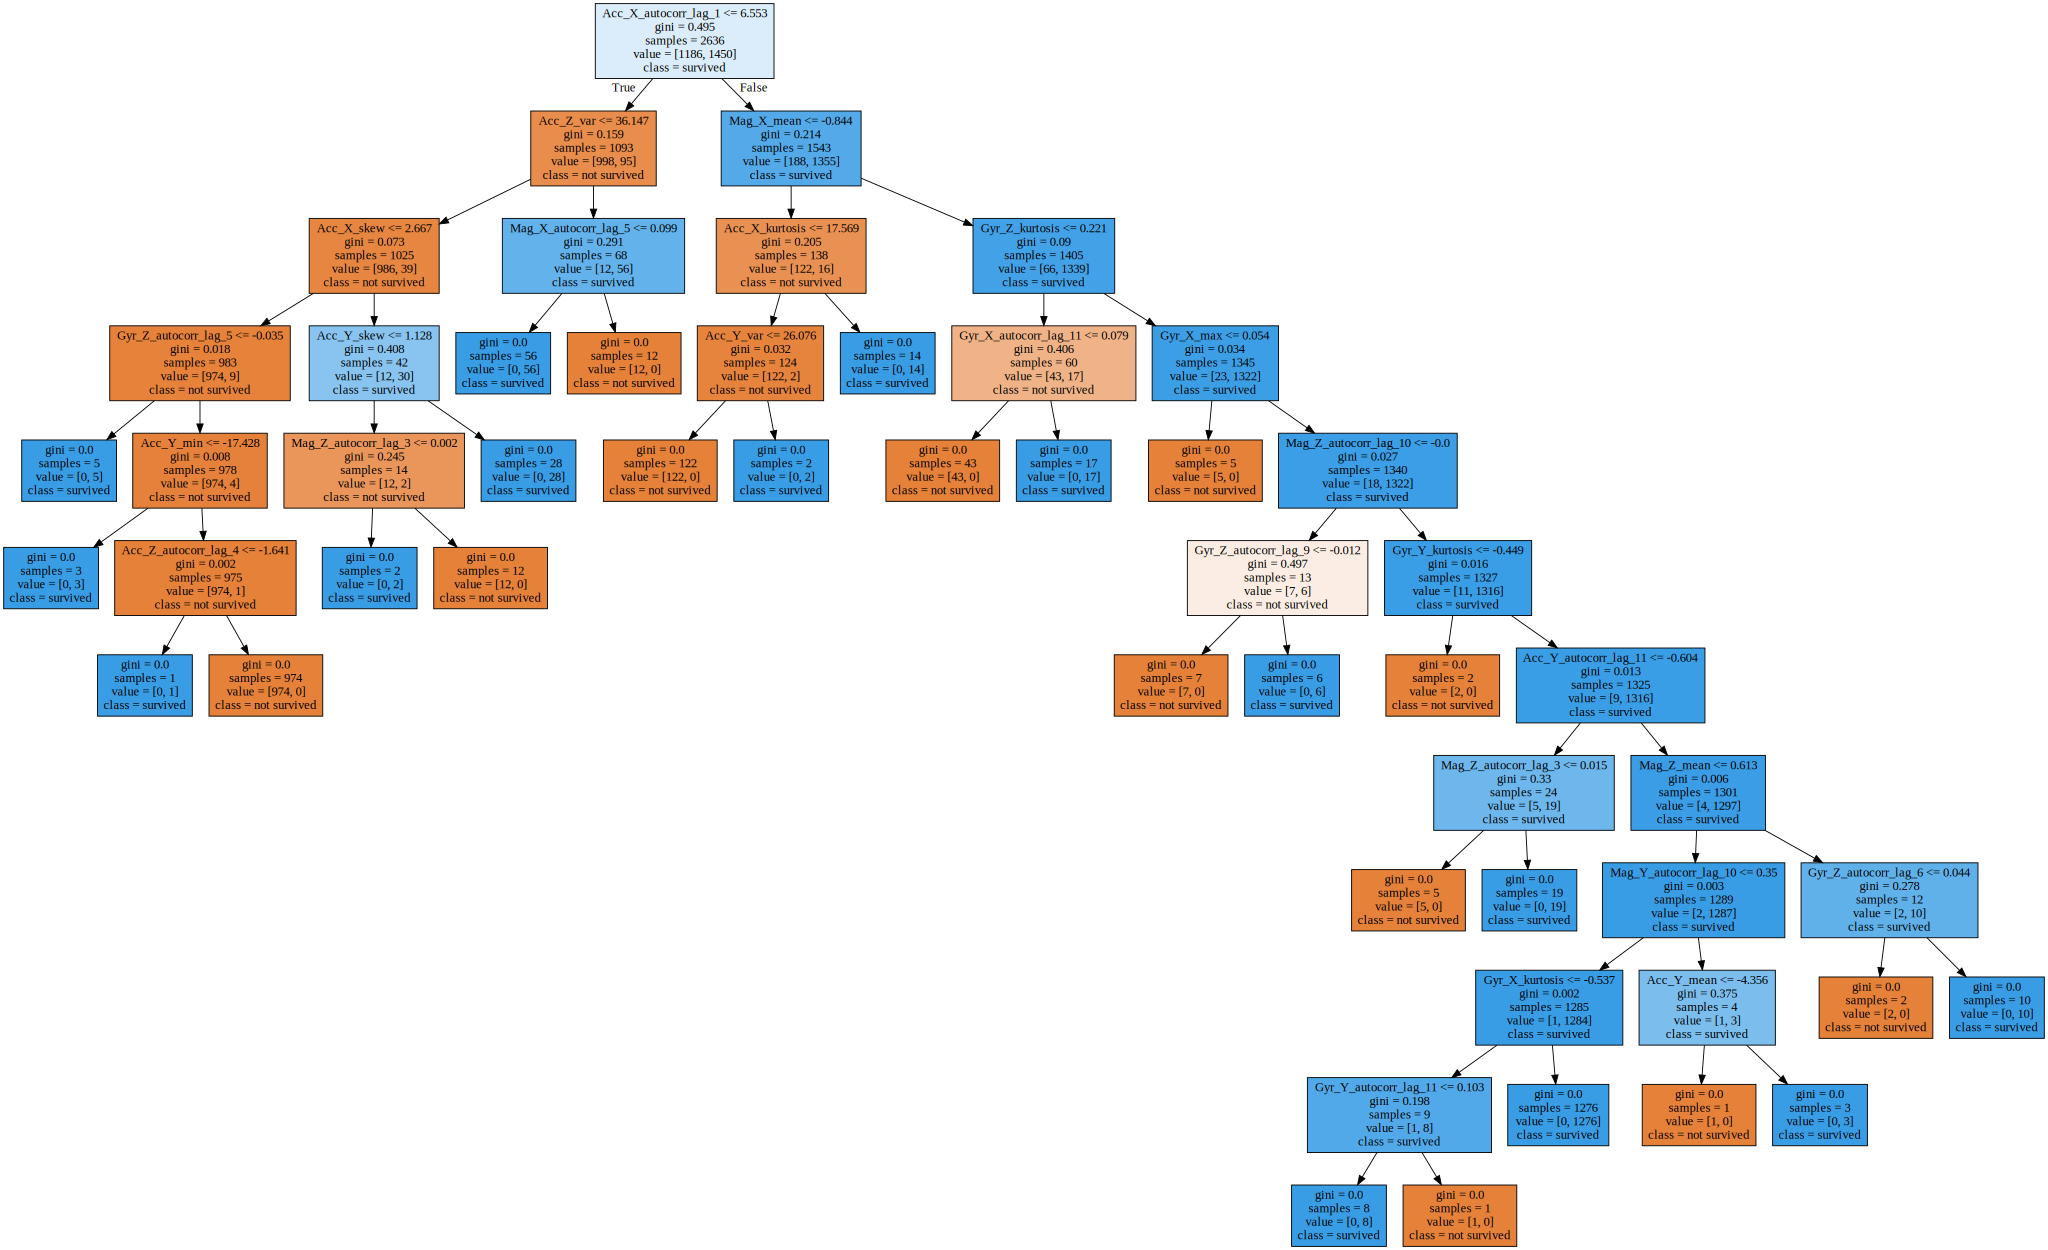

In [20]:
from sklearn import tree
import graphviz

def export_decision_tree(clf, feature_names):
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=feature_names,
                                    class_names=['not survived', 'survived'],
                                    filled=True)
    return graphviz.Source(dot_data)

clf = tree.DecisionTreeClassifier(max_depth=None, random_state=815).fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
display(export_decision_tree(clf, X.columns))

# Using deep learning

In [12]:
from falldetection.time_series_extractor_workflow import extract_time_series
from falldetection.sensor import Sensor

X, y = extract_time_series(
            sensor=Sensor.RIGHT_THIGH,
            baseDir='data/FallDataSet',
            columns=['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z'])
# columns=['Acc_X', 'Acc_Y', 'Acc_Z', 'Gyr_X', 'Gyr_Y', 'Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']

In [22]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [27]:
# create the model
data_dim = X.shape[2] # = number of features = [{Acc_x, Acc_y, Acc_z, Gyr_*, Max_*, }] = 9
timesteps = X.shape[1] # = 101 = (half_window_size:=50) * 2 + 1
num_classes = 1 # fall?

model = Sequential()
# model.add(LSTM(100, input_shape=(timesteps, data_dim)))
# model.add(Dense(num_classes, activation='sigmoid'))
# or:
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(timesteps, data_dim)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 101, 32)           896       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 54,197
Trainable params: 54,197
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
from sklearn.model_selection import train_test_split

# Generate dummy
numpy.random.seed(815)
num_samples = 10000
#X = np.random.random((num_samples, timesteps, data_dim))test_size
#y = np.random.choice([False, True], size=(num_samples, 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=815)

In [34]:
print(len(y_test))
print(len(y_test[y_test == True])/len(y_test))
print(len(y_test[y_test == False])/len(y_test))

660
0.5636363636363636
0.43636363636363634


In [30]:
model.fit(X_train, y_train,
          batch_size=64, epochs=10,
          validation_data=(X_test, y_test))

Train on 2636 samples, validate on 660 samples
Epoch 1/10
2636/2636 [==============================] - 3s 958us/step - loss: 0.3344 - acc: 0.8653 - val_loss: 0.1956 - val_acc: 0.9182
Epoch 2/10
2636/2636 [==============================] - 2s 756us/step - loss: 0.1603 - acc: 0.9359 - val_loss: 0.1430 - val_acc: 0.9364
Epoch 3/10
2636/2636 [==============================] - 2s 762us/step - loss: 0.1168 - acc: 0.9530 - val_loss: 0.1181 - val_acc: 0.9591
Epoch 4/10
2636/2636 [==============================] - 2s 873us/step - loss: 0.0710 - acc: 0.9727 - val_loss: 0.0510 - val_acc: 0.9788
Epoch 5/10
2636/2636 [==============================] - 2s 817us/step - loss: 0.0381 - acc: 0.9844 - val_loss: 0.0333 - val_acc: 0.9894
Epoch 6/10
2636/2636 [==============================] - 2s 813us/step - loss: 0.0492 - acc: 0.9822 - val_loss: 0.0414 - val_acc: 0.9909
Epoch 7/10
2636/2636 [==============================] - 2s 849us/step - loss: 0.0197 - acc: 0.9954 - val_loss: 0.0169 - val_acc: 0.9955
E

In [31]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores, model.metrics_names

660/660 [==============================] - 0s 284us/step
Accuracy: 99.55%


([0.012742090208286589, 0.9954545454545455], ['loss', 'acc'])

In [32]:
from sklearn.metrics import accuracy_score

predictions = model.predict_classes(X_test)
accuracy_score(y_test, predictions)

0.9954545454545455